In [1]:
#This cell imports all the necessary packages and the lower half formats the plots being made in this notebook
import pandas as pd 
import numpy as np
from datetime import datetime
import datatools
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pvlib
import pvanalytics

%matplotlib inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

mpl.rcParams['font.size']=12
mpl.rcParams['lines.linewidth']=1
mpl.rcParams['xtick.labelsize']=10
#mpl.rcParams['font.weight']='bold'
mpl.rcParams['axes.titlesize']=22

In [2]:
engine = datatools.database.create_mss_engine()
#Accessing databases require the creation of an engine, datatools has a specific function to do that for an SQL server database
# on the SRN database. If you want to see all database options run:
#datatools.database.get_all_tables(engine)

In [3]:
#Start by identifying the desired table for the meteorological data 
tablename = 'dbo.SNLA_Met_DataOut'
#If you needed the column info you could uncomment:
##column_info = datatools.database.get_columns_from_table(table = tablename,
##                       engine=engine
##                      )
##[column[3] for column in column_info]

In [4]:
#We can now import the data we want from the table defined above
start = '2020-03-01 00:00:00'
end = '2021-02-28 00:00:00'
met_sql = f"select * from {tablename} where TmStamp between '{start}' and '{end}';"
met = pd.read_sql(met_sql, engine, index_col='TmStamp')
met.index = pd.DatetimeIndex(met.index)
met.index = met.index.tz_localize('MST') 
[met.index.min(),  met.index.max()]

[Timestamp('2020-03-01 00:00:00-0700', tz='MST'),
 Timestamp('2021-02-28 00:00:00-0700', tz='MST')]

In [5]:
#met.to_csv('Met.csv')
met.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524116 entries, 2020-03-01 00:00:00-07:00 to 2021-02-28 00:00:00-07:00
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RecNum             524116 non-null  float64
 1   Global_Wm2_Avg     524111 non-null  float64
 2   Direct_Wm2_Avg     524049 non-null  float64
 3   Diffuse_Wm2_Avg    524107 non-null  float64
 4   Pressure_mBar_Avg  524116 non-null  float64
 5   WS_ms_Mean         524116 non-null  float64
 6   Wdir_Mean          524116 non-null  float64
 7   Wdir_Std           524116 non-null  float64
 8   WS_ms_Std          524116 non-null  float64
 9   WS_ms_3sec_Max     524116 non-null  float64
 10  WD_deg_SMM         524116 non-null  float64
 11  Temp_C_Avg         524116 non-null  float64
 12  RH_pct_Avg         524116 non-null  float64
 13  Panel_Temp_C_Avg   524116 non-null  float64
 14  Battery_V_Avg      524116 non-null  float64
 15  Proce

In [6]:
pwd

'C:\\Users\\lmdevil\\Documents\\Jupyter Notebook'

In [7]:
#Then identify the table of system data to be used
tablename = 'dbo.PVLT_Pan_LG_Panasonic_LG'
#If you needed the column info you could uncomment:
##column_info = datatools.database.get_columns_from_table(table = tablename,
##                       engine=engine
##                      )
##[column[3] for column in column_info]

In [8]:
#We can import the same time frame of data from our system as we did the meteo data
start = '2020-03-01 00:00:00'
end = '2021-02-28 23:59:00'
sys_sql = f"select * from {tablename} where TmStamp between '{start}' and '{end}';"
sys = pd.read_sql(sys_sql, engine, index_col='TmStamp')
sys.index = pd.DatetimeIndex(sys.index)
sys.index = sys.index.tz_localize('MST')
[sys.index.min(),  sys.index.max()]

[Timestamp('2020-03-01 00:00:00-0700', tz='MST'),
 Timestamp('2021-02-28 23:59:00-0700', tz='MST')]

In [9]:
#Just to check that things imported correctly, print a small section of each table

In [10]:
#met.head(5)

In [11]:
#sys.head(5)

In [12]:
#We need to join the databases so they have the same index
df = pd.merge(met,sys,how='inner', left_index=True, right_index=True)
df.columns

Index(['RecNum_x', 'Global_Wm2_Avg', 'Direct_Wm2_Avg', 'Diffuse_Wm2_Avg',
       'Pressure_mBar_Avg', 'WS_ms_Mean', 'Wdir_Mean', 'Wdir_Std', 'WS_ms_Std',
       'WS_ms_3sec_Max', 'WD_deg_SMM', 'Temp_C_Avg', 'RH_pct_Avg',
       'Panel_Temp_C_Avg', 'Battery_V_Avg', 'ProcessTime_S_Max',
       'Global_mV_Avg', 'Rain_mm_Tot', 'Rain_mm_Daily', 'Temp_CMP22_C_Avg',
       'RecNum_y', 'BroadbandPOA_Avg', 'POACleanRC_E_Avg', 'GHI_Avg',
       'Albedo_Avg', 'AmbientTemp_Avg', 'PH1_V_Avg', 'PH2_V_Avg', 'PH3_V_Avg',
       'PH4_V_Avg', 'LM1_V_Avg', 'LM2_V_Avg', 'LM3_V_Avg', 'LM4_V_Avg',
       'PH1_I_Avg', 'PH2_I_Avg', 'PH3_I_Avg', 'PH4_I_Avg', 'LM1_I_Avg',
       'LM2_I_Avg', 'LM3_I_Avg', 'LM4_I_Avg', 'PH1_RTD_Avg', 'PH2_RTD_Avg',
       'PH3_RTD_Avg', 'PH4_RTD_Avg', 'LM1_RTD_Avg', 'LM2_RTD_Avg',
       'LM3_RTD_Avg', 'LM4_RTD_Avg', 'Wind_Speed_Avg', 'Wind_Direction_Avg',
       'Wind_Dir_std', 'Wind_Gust_Max'],
      dtype='object')

In [13]:
#Calculate SunPositions
latitude = 35.05
longitude = -106.54
solpos = pvlib.solarposition.get_solarposition(df.index, latitude, longitude)
dni_extra = pvlib.irradiance.get_extra_radiation(df.index)

In [14]:
#Create a mask to filter out all times where the elevation of the sun is less than 15 degrees
mask = solpos['elevation'] > 20 
newsolpos = solpos[mask]
#change out merged df and our dni_extra, calculated above, to now only have the same index times as the newsolpos
newdf = df.loc[df.index & newsolpos.index]
newdni = dni_extra.loc[dni_extra.index & newsolpos.index]

<ipython-input-14-e167220bd915>:5: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  newdf = df.loc[df.index & newsolpos.index]
<ipython-input-14-e167220bd915>:6: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  newdni = dni_extra.loc[dni_extra.index & newsolpos.index]


(-10.0, 1500.0)

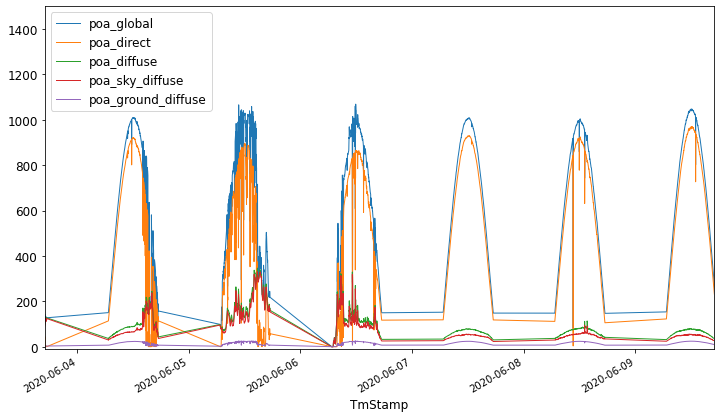

In [15]:
#Calculate Plane of Array (POA) Irradiance
tilt = 35
surface_azimuth = 180
altitude = 1600
#dni_extra = pvlib.irradiance.get_extra_radiation(newdf.index)

total_irrad = pvlib.irradiance.get_total_irradiance(tilt,surface_azimuth,
        newsolpos['apparent_zenith'],
        newsolpos['azimuth'],
        newdf.Direct_Wm2_Avg, 
        newdf.Global_Wm2_Avg, 
        newdf.Diffuse_Wm2_Avg,
        newdni,
        model='haydavies')

total_irrad.plot(figsize=(12,7))
plt.xlim('2020-06-04','2020-06-10')
plt.ylim(-10,1500)

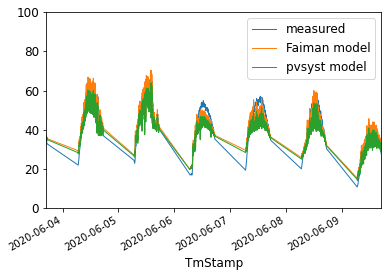

In [16]:
#Calculate Module and Cell Temperature using Faiman Temperature Model
# Model Module temperature
U0 = 24.614 #CFV report
U1 = 7.878 #CFV report
T_faiman = pvlib.temperature.faiman(
    newdf.BroadbandPOA_Avg, newdf.AmbientTemp_Avg, newdf.Wind_Speed_Avg,U0,U1)
T_pvsyst_cell = pvlib.temperature.pvsyst_cell(
    newdf.BroadbandPOA_Avg, newdf.AmbientTemp_Avg, newdf.Wind_Speed_Avg, u_c=U0, u_v=U1, eta_m=0.1, alpha_absorption=0.9)
T_meas = newdf['PH1_RTD_Avg'].copy()

# Plot measured and modeled temperature
T_meas.plot(label='measured')
T_faiman.plot(label='Faiman model')
T_pvsyst_cell.plot(label='pvsyst model')
plt.xlim('2020-06-04','2020-06-10')
plt.ylim(0,100)
plt.legend(loc='best')

(18417.0, 18423.0)

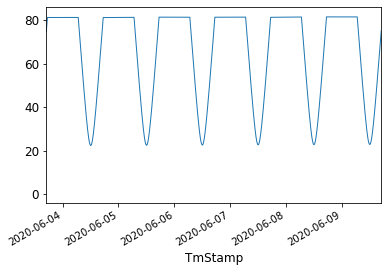

In [17]:
#Calculate angle of incidence (aoi)
aoi = pvlib.irradiance.aoi(tilt, surface_azimuth, solar_zenith=newsolpos['apparent_zenith'],
        solar_azimuth=newsolpos['azimuth'])
aoi.plot()
plt.xlim('2020-06-04','2020-06-10')

(18417.0, 18423.0)

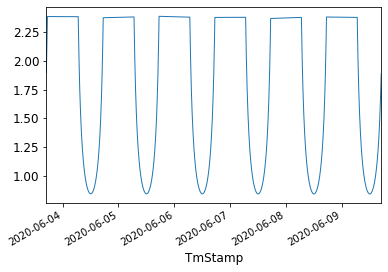

In [18]:
#Calculate absolute airmass
airmass = pvlib.atmosphere.get_relative_airmass(newsolpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
am_abs.plot()
plt.xlim('2020-06-04','2020-06-10')

In [19]:
#Define the inverter parameters & create a dataframe for inverter info
inverter = {"Vac":480, "Paco":20000, "Pdco":20400, "Vdcmax":1000 ,"Idcmax":66 , "Mppt_low":380 , "Mppt_high":800, "Pnt":0.075,
           "Pso":2.089, "Vdco":150, "C0":0, "C1":0, "C2":0, "C3":0}

In [20]:
#Model cell and module temperature
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
tcell = pvlib.temperature.sapm_cell(total_irrad['poa_global'],
            newdf.AmbientTemp_Avg, newdf.Wind_Speed_Avg,
            **temperature_model_parameters)

In [21]:
#Define Panasonic Module Parameters & create a dataframe for module info
module = {"Vintage":"2016", "Area":"1.67", "Material": "HIT", "Cells_in_Series":96, "Parallel_Strings":1, "Isco":5.87, 
          "Voco":69.67, "Impo":5.48, "Vmpo":57.72, "Aisc":0.000711, "Aimp":0.0003836, "C0":0.994695, "C1":0.005305,
          "Bvoco":-0.171865, "Mbvoc":0, "Bvmpo":-0.1689897, "Mbvmp":0, "N":0.97, "C2":-0.15253, "C3":-15.838,
          "A0":0.95159011, "A1":0.035565004, "A2":-0.001762823, "A3":-0.00033466, "A4":0.00003125,  "A":-3.40567, "B":-0.11234,
         "B5":-2.33454E-09, "B4":3.76061E-07, "B3":-2.16746E-05, "B2":0.000497174, "B1":-0.003944734, "B0":1, "FD":1,
         "IXO":0, "IXXO":0, "C4":0, "C5":0, "C6":0, "C7":0}

In [22]:
#Calculating the effective irradiance, then calculating the dc power out put of modules & ac output of inverters
pan_effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
            total_irrad['poa_direct'], total_irrad['poa_diffuse'],
            am_abs, aoi, module)
pan_dc = pvlib.pvsystem.sapm(pan_effective_irradiance, tcell, module)
pan_ac = pvlib.inverter.sandia(pan_dc['v_mp'], pan_dc['p_mp'], inverter)

Text(0, 0.5, 'Power')

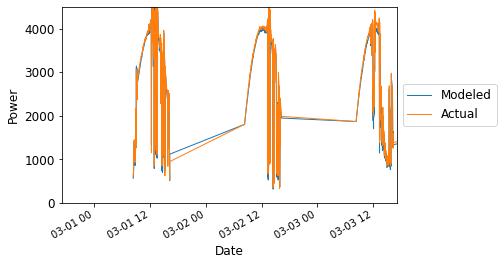

In [23]:
#Account for 4 strings of 12 Panasonic modules
pan_string_v = pan_dc['v_mp']*12
pan_string_p = pan_dc['i_mp']*pan_string_v
pan_actual_string_p = newdf['PH4_V_Avg']*newdf['PH4_I_Avg']


#Plot the modeled vs actual performance
pan_string_p.plot(label = 'Modeled')
pan_actual_string_p.plot(label = 'Actual')
plt.xlim('2020-03-01', '2020-03-04')
plt.ylim(0,4500)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Date')
plt.ylabel('Power')

In [24]:
#Resample the data to get the sum of all power produced in a month
pan_monthly_string_p = pan_string_p.resample
pan_actual_monthly = pan_actual_string_p.resample('H').mean()

#Plot the modeled power against the actual power
#pan_monthly_string_p.plot(label = 'Modeled')
#pan_actual_monthly.plot(label = 'Actual')
#plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.xlabel('Date')
#plt.ylabel('Voltage')

#Plot the ratio of measured power to modeled power
#ratio = (pan_actual_monthly/pan_monthly_string_p)
#ratio.plot()
#plt.xlabel('Date')
#plt.ylabel('Ratio of Measured to Modeled Power')

In [25]:
samr = pd.read_csv('results.csv')
date_rng = pd.date_range(start='3/1/2020', end='3/1/2021', freq='H')
date_rng = date_rng.drop(pd.Timestamp('2021-03-01 00:00:00'))
samr.index = date_rng
samr.index = samr.index.tz_localize('MST')

(442656.0, 442800.0)

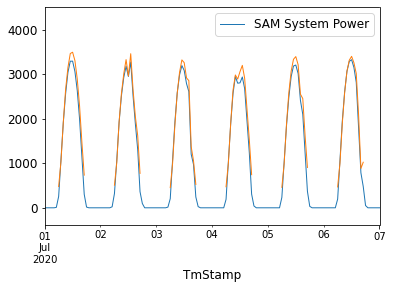

In [26]:
samr.plot()
pan_actual_monthly.plot()
plt.xlim('2020-07-01', '2020-07-07')

<AxesSubplot:xlabel='TmStamp'>

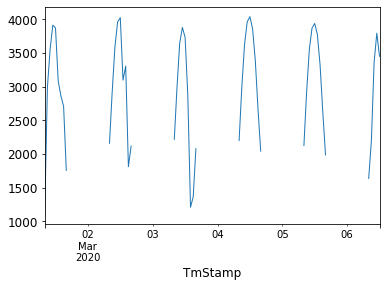

In [27]:
pan_actual_monthly5 = pan_actual_monthly.head(125)
pan_actual_monthly5.plot()

In [28]:
 #Define LG Module Parameters & create a dataframe for module info
module = {"Vintage":"2017", "Area":"1.71", "Material": "c-Si", "Cells_in_Series":60, "Parallel_Strings":1, "Isco":10.15, 
          "Voco":39.94, "Impo":9.64, "Vmpo":32.48, "Aisc":0.000706, "Aimp":0.0003228, "C0":1.014279, "C1":-0.01428,
          "Bvoco":-0.111204, "Mbvoc":0, "Bvmpo":-0.1185716, "Mbvmp":0, "N":0.96, "C2":-0.40033, "C3":-14.7721,
          "A0":0.967748, "A1":0.023426, "A2":-0.0008, "A3":-0.00037, "A4":0.00003219, "A":-3.57414, "B":-0.1184, 
         "B5":-1.49207E-09, "B4":2.33152E-07, "B3":-1.35142E-05, "B2":0.000313806, "B1":-0.00248674, "B0":1, "FD":1,
         "IXO":0, "IXXO":0, "C4":0, "C5":0, "C6":0, "C7":0}

In [29]:
lg_effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
            total_irrad['poa_direct'], total_irrad['poa_diffuse'],
            am_abs, aoi, module)
lg_dc = pvlib.pvsystem.sapm(lg_effective_irradiance, tcell, module)
lg_ac = pvlib.inverter.sandia(lg_dc['v_mp'], lg_dc['p_mp'], inverter)

Text(0, 0.5, 'Power')

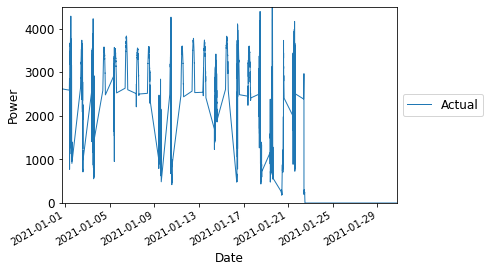

In [30]:
#Account for 4 strings of 12 LG modules
lg_string_v = lg_dc['v_mp']*12
lg_string_p = lg_dc['i_mp']*lg_string_v
lg_actual_p = newdf['LM1_V_Avg']*newdf['LM1_I_Avg']


#Plot the modeled vs actual performance
#lg_string_p.plot(label = 'Modeled')
lg_actual_p.plot(label = 'Actual')
plt.xlim('2021-01-01', '2021-01-31')
plt.ylim(0,4500)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Date')
plt.ylabel('Power')

Text(0, 0.5, 'Ratio of Measured to Modeled Power')

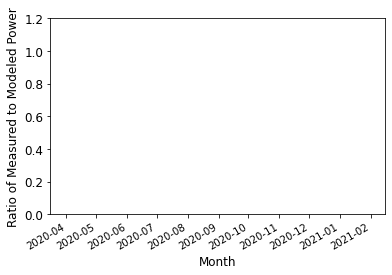

In [33]:
#Resample the data to get the sum of all power produced in a month
lg_monthly_string_p = lg_string_p.resample('M').sum()
lg_actual_monthly = lg_actual_p.resample('H').sum()

#lg_monthly_string_p.plot(label = 'Modeled')
#lg_actual_monthly.plot(label = 'Actual')
#plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.xlabel('Date')
#plt.ylabel('Power')

#Plot the ratio of measured power to modeled power
ratio = (lg_actual_monthly/lg_monthly_string_p)
ratio.plot()
plt.ylim(0,1.2)
plt.xlabel('Month')
plt.ylabel('Ratio of Measured to Modeled Power')

In [32]:
lg_actual_monthly

TmStamp
2020-03-01 08:00:00-07:00     41540.552537
2020-03-01 09:00:00-07:00    172685.575598
2020-03-01 10:00:00-07:00    204097.464218
2020-03-01 11:00:00-07:00    223098.808463
2020-03-01 12:00:00-07:00    220587.357146
                                 ...      
2021-02-27 12:00:00-07:00         0.197676
2021-02-27 13:00:00-07:00         0.188716
2021-02-27 14:00:00-07:00         0.154173
2021-02-27 15:00:00-07:00         0.171950
2021-02-27 16:00:00-07:00         0.044912
Freq: H, Length: 8721, dtype: float64